### 1a. Dataloading, Preprocessing, Modeling, Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df = pd.read_csv("/Users/luisi/Downloads/Data/features_3_sec.csv") 

# Step 1: Features
X_features = df.drop(["label", "filename", "length"], axis = 1)

# Step 2: Feature Scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_features), columns = X_features.columns)

# Step 3: Applying PCA
pca = PCA(n_components=24) 
X_pca = pca.fit_transform(X_scaled)

# Step 4: Applying K-Means with optimal K
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

### 1b. Visualization

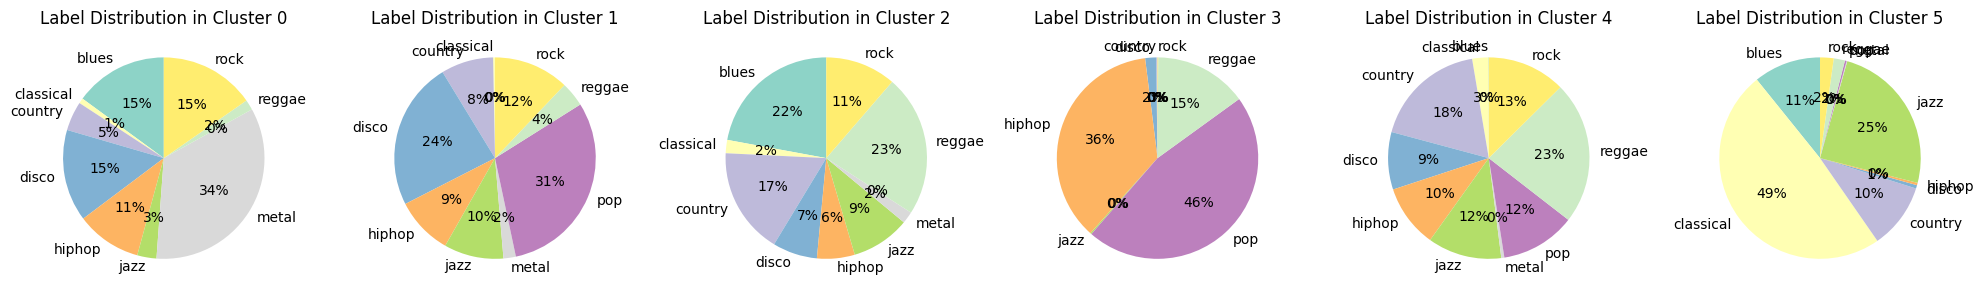

In [2]:
df["cluster"] = cluster_labels
comparison_table = pd.crosstab(df["label"], df["cluster"])
comparison_table_percentage = comparison_table.div(comparison_table.sum(axis=0), axis=1) * 100

fig, axes = plt.subplots(nrows=1, ncols=len(comparison_table_percentage.columns), figsize=(20, 10))
for i, cluster in enumerate(comparison_table_percentage.columns):
    comparison_table_percentage[cluster].plot.pie(ax=axes[i], autopct="%1.0f%%", startangle=90, cmap="Set3")
    axes[i].set_title(f"Label Distribution in Cluster {cluster}")
    axes[i].set_ylabel('')  

plt.tight_layout()
plt.show()

### 2. Predicting

In [3]:
new_sample = pd.read_csv("/Users/luisi/Downloads/not_scaled_no-copyright-music-happy-306601 (1).csv")

In [4]:
new_sample = new_sample.drop(["filename", "length"], axis = 1)
new_sample_scaled = scaler.transform(new_sample) 

new_sample_pca = pca.transform(new_sample_scaled)
predicted_cluster = kmeans.predict(new_sample_pca)[0]
predicted_cluster

/Users/luisi/.pyenv/versions/3.10.6/envs/k_means_klang/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


np.int32(2)